# Summary figure of drainage density, incision for multiple model runs

In [117]:
import string
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [118]:
pl.rcParams['mathtext.default'] = 'regular'

In [119]:
# use change_params = None to have the code search for the parameters that were changed in the model result file
changed_params = ['P', 'S_init', 'U', 'specific_yield', 'T', 'K_d', 'k_f']


In [120]:
# sensitivity analysis, randomly perturbed topography as starting point
fn = 'model_results/model_results_71_runs_10000yrs_sensitivity_all_id_208_26-7-2021.csv'

# sensitivity analysis, incised topography base case as starting pt
#fn = 'model_results/model_results_71_runs_50000yrs_persistence_id_484_28-7-2021.csv'

In [121]:
today = datetime.datetime.now()
today_str = '%i-%i-%i' % (today.day, today.month, today.year)

## Read files

In [122]:
df = pd.read_csv(fn)

In [123]:
## Remove values T < 1e-4 where the wattertable is fully at the surface

In [124]:
#df = df.loc[df['T'] >= 1e-4]

## Figure out changed parameters

In [125]:

if changed_params is None:
    #changed_params = []


    cols = df.columns.tolist()
    cols = [c for c in cols if 'Unnamed' not in c]

    input_cols = cols[:cols.index('n_streams')]

    nus = np.array([len(df[col].unique()) for col in input_cols])

    changed_param_ind = np.where(nus > 1)[0]
    changed_params = [input_cols[ci] for ci in changed_param_ind] 

    #changed_params.append(changed_param)

    print('changed parameters in model sensitivity runs:')
    print(changed_params)

In [126]:
param_labels = []

param_labels_in = ['P', 'S_init', 'U', 'specific_yield', 'T', 'K_d', 'k_f']
param_labels_out = ['precipitation', 'initial slope', 'baselevel change', 'specific yield',  'transmissivity',
                    'sediment transport coefficient', 'hillslope diffusion coefficient']

for changed_param in changed_params:
    if changed_param in param_labels_in:
        xlabel = param_labels_out[param_labels_in.index(changed_param)]
    else:
        xlabel = changed_param
        
    param_labels.append(xlabel)
    
print('parameter labels: ', param_labels)

parameter labels:  ['precipitation', 'initial slope', 'baselevel change', 'specific yield', 'transmissivity', 'sediment transport coefficient', 'hillslope diffusion coefficient']


## Sort params with decreasing stream density change

In [127]:
sort_params = False

if sort_params is True:
    sd_change = np.zeros(len(changed_params))

    for i, changed_param in enumerate(changed_params):
        # assume first model run is the base case
        base_param = df.iloc[0][changed_param]

        sensitivity_runs_id = df[changed_param] != base_param

        stream_density = df.loc[sensitivity_runs_id, 'stream_density_str_per_km'].values

        sd_change[i] = np.max(stream_density) - np.min(stream_density)

    a = np.argsort(sd_change)

    changed_params = [changed_params[ai] for ai in a][::-1]
    param_labels = [param_labels[ai]  for ai in a][::-1]

    print(changed_params, param_labels)

In [128]:
import matplotlib

cmap = matplotlib.cm.get_cmap('tab10')

In [129]:
cmap(0.1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

## Make figure

saving figure as model_results/sensitivity_fig_7_params_2-8-2021.pdf


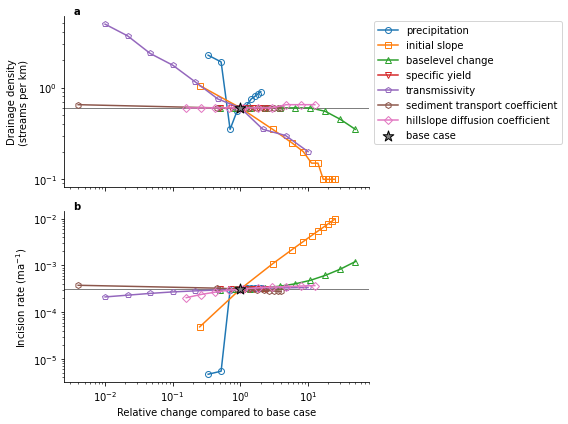

In [130]:
fig, axs = pl.subplots(2, 1, figsize=(8, 6), sharex=True)

lw = 1.5
s = 75

import matplotlib

cmap = matplotlib.cm.get_cmap('tab10')

colors = cmap(np.arange(0.0, 1.1, 0.1))

drainage_density_base = df.iloc[0]['stream_density_str_per_km']
incision_rate_base = df.iloc[0]['incision_rate_m_per_yr']

markers = ['o', 's', '^', 'v', 'p', 'h', 'D']

#for scenario_param_name in scenario_param_names:
for changed_param, param_label, color, marker in zip(changed_params, param_labels, colors, markers):
    
    # assume first model run is the base case
    base_param = df.iloc[0][changed_param]
    
    sensitivity_runs_id = df[changed_param] != base_param
    
    param_vals = df.loc[sensitivity_runs_id, changed_param].values
    
    #base_val = param_vals[0]
    drainage_density = df.loc[sensitivity_runs_id, 'stream_density_str_per_km']
    #wt_depth_avg
    incision_rate = df.loc[sensitivity_runs_id, 'incision_rate_m_per_yr']
    
    # add base case
    param_vals = np.append(param_vals, base_param)
    drainage_density = np.append(drainage_density, drainage_density_base)
    incision_rate = np.append(incision_rate, incision_rate_base)
    
    # sort values to get correct order
    sorder = np.argsort(param_vals)
    param_vals = param_vals[sorder]
    drainage_density = drainage_density[sorder]
    incision_rate = incision_rate[sorder]
    
    # show relative change
    param_val_relative = param_vals / base_param

    #axs[0].scatter(param_val_relative, drainage_density, edgecolor='black', facecolor=color, lw=lw, s=s, label=param_label)
    axs[0].plot(param_val_relative, drainage_density, color=color, lw=lw, label=param_label, marker=marker, mfc='None')
    axs[0].set_ylabel('Drainage density\n(streams per km)')
    #axs[0].set_xscale('log')
    
    
    #axs[1].scatter(param_val_relative, incision_rate, edgecolor='black', facecolor=color, lw=lw, s=s)
    axs[1].plot(param_val_relative, incision_rate, color=color, lw=lw, marker=marker, mfc='None')
    axs[1].set_ylabel(r'Incision rate ($m a^{-1}$)')
    #axs[0].set_xscale('log')


axs[0].scatter(1.0, drainage_density_base, 
               edgecolor='black', facecolor='gray', marker='*', s=125, label='base case', zorder=100)
axs[0].axhline(y=drainage_density_base, ls='-', color='black', lw=0.5, zorder=1)

axs[1].scatter(1.0, incision_rate_base, 
               edgecolor='black', facecolor='gray', marker='*', s=125, zorder=100)
axs[1].axhline(y=incision_rate_base, ls='-', color='black', lw=0.5, zorder=1)

#axs[0].legend(frameon=False)

handles, labels = axs[0].get_legend_handles_labels()
lgd = axs[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.0, string.ascii_lowercase[i], 
        weight='bold', transform=ax.transAxes, ha='left', va='bottom')
    ax.set_yscale('log')

axs[-1].set_xlabel('Relative change compared to base case')
axs[0].set_xscale('log')

#axs[0].set_ylim(8e-2, 1.1e+1)

fig.tight_layout()

fn = f'model_results/sensitivity_fig_{len(changed_params)}_params_{today_str}.pdf' 
print('saving figure as %s' % fn)

fig.savefig(fn)

## Side by side figure of two sets of model sensitivity analyses

In [131]:
#fn = 'model_results/model_results_71_runs_10000yrs_sensitivity_all_id_208_26-7-2021.csv'
fns = ['model_results/model_results_71_runs_10000yrs_sensitivity_all_id_208_26-7-2021.csv',
       'model_results/model_results_71_runs_10000yrs_persistence_10kyr_id_136_29-7-2021.csv',
       'model_results/model_results_71_runs_50000yrs_persistence_id_484_28-7-2021.csv']


In [132]:
dfs = [pd.read_csv(fn) for fn in fns]

saving figure as model_results/sensitivity_comparison_fig_7_params_2-8-2021.pdf


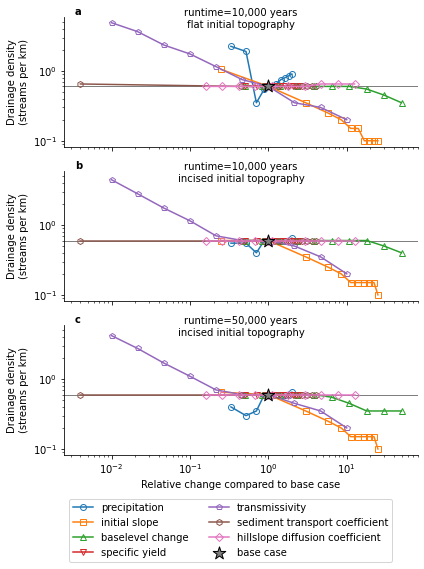

In [133]:
nax = len(fns)

fig, axs = pl.subplots(nax, 1, figsize=(6, 0.5+nax*2.5), sharex=True, sharey=True)

for df, ax in zip(dfs, axs):
    #for scenario_param_name in scenario_param_names:
    for changed_param, param_label, color, marker in zip(changed_params, param_labels, colors, markers):

        # assume first model run is the base case
        base_param = df.iloc[0][changed_param]

        sensitivity_runs_id = df[changed_param] != base_param

        param_vals = df.loc[sensitivity_runs_id, changed_param].values

        #base_val = param_vals[0]
        drainage_density = df.loc[sensitivity_runs_id, 'stream_density_str_per_km']
        #wt_depth_avg
        incision_rate = df.loc[sensitivity_runs_id, 'incision_rate_m_per_yr']

        # add base case
        param_vals = np.append(param_vals, base_param)
        drainage_density = np.append(drainage_density, drainage_density_base)
        incision_rate = np.append(incision_rate, incision_rate_base)

        # sort values to get correct order
        sorder = np.argsort(param_vals)
        param_vals = param_vals[sorder]
        drainage_density = drainage_density[sorder]
        incision_rate = incision_rate[sorder]

        # show relative change
        param_val_relative = param_vals / base_param

        #axs[0].scatter(param_val_relative, drainage_density, edgecolor='black', facecolor=color, lw=lw, s=s, label=param_label)
        ax.plot(param_val_relative, drainage_density, color=color, lw=lw, label=param_label, marker=marker, mfc='None')
        #axs[0].set_xscale('log')

    ax.scatter(1.0, drainage_density_base, 
                   edgecolor='black', facecolor='gray', marker='*', s=175, label='base case', zorder=100)
    ax.axhline(y=drainage_density_base, ls='-', color='black', lw=0.5, zorder=1)

    #axs[-1].legend(frameon=False)

        
handles, labels = axs[0].get_legend_handles_labels()
lgd = axs[-1].legend(handles, labels, loc='upper left', bbox_to_anchor=(0.0, -0.3), ncol=2)

tekst = ['runtime=10,000 years\nflat initial topography',
         'runtime=10,000 years\nincised initial topography',
         'runtime=50,000 years\nincised initial topography']

for ax, t in zip(axs, tekst):
    ax.text(0.5, 1.07, t, transform=ax.transAxes, ha='center', va='top')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.0, string.ascii_lowercase[i], 
        weight='bold', transform=ax.transAxes, ha='left', va='bottom')
    ax.set_yscale('log')

    ax.set_xscale('log')

for ax in axs:
    ax.set_ylabel('Drainage density\n(streams per km)')
axs[-1].set_xlabel('Relative change compared to base case')

#axs[0].set_ylim(8e-2, 1.1e+1)

fig.tight_layout()

fn = f'model_results/sensitivity_comparison_fig_{len(changed_params)}_params_{today_str}.pdf' 
print('saving figure as %s' % fn)

fig.savefig(fn)

## Report relation T and drainage density

LinregressResult(slope=-0.40172759882063414, intercept=-1.0870834819913926, rvalue=-0.9801274855622778, pvalue=3.57273750841632e-06, stderr=0.030730743475271785, intercept_stderr=0.08426344374379635) 0.9606498879546331


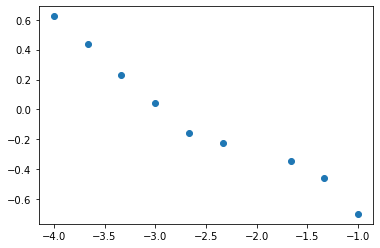

In [134]:
import scipy.stats

changed_param = 'T'

base_param = df.iloc[0][changed_param]
sensitivity_runs_id = df[changed_param] != base_param

x = df.loc[sensitivity_runs_id, changed_param].values
#y = df.loc[sensitivity_runs_id, 'incision_rate_m_per_yr'].values * 1e4
y = df.loc[sensitivity_runs_id, 'S_init'].values * 1e4
z = df.loc[sensitivity_runs_id, 'stream_density_str_per_km'].values

lx = np.log10(x)
lz = np.log10(z)

reg = scipy.stats.linregress(lx, lz)


fig, ax = pl.subplots(1, 1)
ax.scatter(np.log10(x), np.log10(z))

print(reg, reg.rvalue**2)


## Compare with literature values

In [135]:
fn = 'data/literature_data_drainage_vs_T.csv'

dfl = pd.read_csv(fn, skiprows=[1])

dfl

,source,DOI,area,area2,drainage_density,drainage_density_std,river_incision,watertable_depth,stream_slope,log_K,log_K_std,log_T
0,de Vries (1994),https://doi.org/10.1016/0022-1694(94)90157-0,southern Netherlands,NaN,0.50,NaN,3.00,NaN,0.0004,NaN,NaN,-2.0
1,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Diamicton,0.88,NaN,4.42,NaN,NaN,-8.00,NaN,NaN
2,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Thames,0.96,NaN,12.51,NaN,NaN,-10.00,NaN,NaN
3,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Chalk,0.54,NaN,55.01,NaN,NaN,-3.47,NaN,NaN
4,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Gault,1.49,NaN,5.92,NaN,NaN,-9.30,NaN,NaN
5,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Lr. Greensand,0.95,NaN,24.80,NaN,NaN,-5.28,NaN,NaN
6,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Up. Jurassic,1.28,NaN,8.31,NaN,NaN,-8.30,NaN,NaN
7,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Oolites,0.56,NaN,43.07,NaN,NaN,-3.66,NaN,NaN
8,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Wealden,1.26,NaN,10.38,NaN,NaN,-9.00,NaN,NaN
9,Bloomington et al. (2011),https://doi.org/10.1002/hyp.8024,"Thames basin, UK",Lias,1.39,NaN,12.69,NaN,NaN,-9.00,NaN,NaN


In [136]:
default_thickness = 100.0

ind = dfl['log_T'].isnull()

dfl.loc[ind, 'log_T'] = np.log10(10**dfl.loc[ind, 'log_K'] * default_thickness)

sources = dfl['source'].unique()



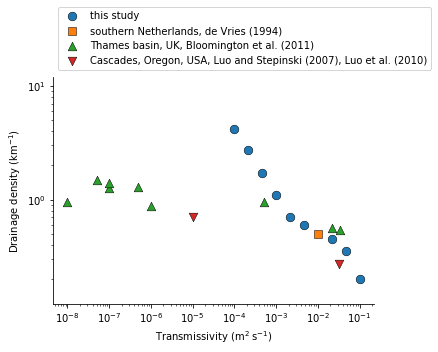

In [137]:
from matplotlib.colors import LogNorm

try:
    from cmcrameri import cm
    cmap2 = cm.batlow
except:
    cmap2 = 'viridis'

    
vmin,vmax = 1, 150

fig, ax = pl.subplots(1, 1, figsize=(6, 5))

sc = ax.scatter(x, z, edgecolor='black', lw=0.5, label='this study', s=75)
#sc = ax.scatter(x, z, c=y, edgecolor='black', lw=0.5, label='this study', cmap=cmap2, vmin=vmin, vmax=vmax, norm=LogNorm())

for source, m in zip(sources, markers[1:]):
    ind = dfl['source'] == source
    
    area = dfl.loc[ind, 'area'].values[0]
    
    label = f'{area}, {source}'
    
    xi = 10**dfl.loc[ind, 'log_T']
    #yi = dfl.loc[ind, 'river_incision']
    zi = dfl.loc[ind, 'drainage_density']
    #xie = 
    
    ax.scatter(xi, zi, edgecolor='black', lw=0.5, label=label, marker=m, s=75)
    #ax.scatter(xi, zi, c=yi, edgecolor='black', lw=0.5, s=100, label=label, marker=m, cmap=cmap2, vmin=vmin, vmax=vmax, norm=LogNorm())

#cb = fig.colorbar(sc, shrink=0.5)
#cb.set_label('Stream incision (m)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(0.12, 12)

ax.set_xlabel(r'Transmissivity ($m^2\;s^{-1}$)')
ax.set_ylabel('Drainage density ($km^{-1}$)')
ax.legend(loc='lower left', bbox_to_anchor=(0.0, 1.01))
#ax.legend(loc='lower left')

fig.tight_layout()
fig.savefig('fig/drainage_density_literature_comp.pdf')

## Alternative figure including incision rate

In [138]:
fn = 'model_results/model_results_100_runs_10000yrs_T_S_combinations_id_110_2-8-2021.csv'

dfc = pd.read_csv(fn, skiprows=[1])

dfc.head()

,Unnamed: 0,model_run,model_error,timestep,runtime_yr,computational_time,ET,K_d,K_n,P,...,width,year,time_yr,n_streams,stream_density_str_per_km,erosion_rate_m_per_yr,incision_rate_m_per_yr,avg_watertable_depth_m,ratio_overland_flow_baseflow,ratio_overland_and_baseflow_erosion
0,1,NaN,NaN,NaN,NaN,NaN,1.188303e-08,3.168809e-10,25.0,2.376607e-08,...,20000,31557600.0,10034.260061,123.0,6.15,1.099780e-06,-0.000163,0.233524,0.344664,0.063481
1,2,NaN,NaN,NaN,NaN,NaN,1.188303e-08,3.168809e-10,25.0,2.376607e-08,...,20000,31557600.0,10034.260061,86.0,4.30,9.128655e-07,-0.000163,0.356998,0.116974,0.020535
2,3,NaN,NaN,NaN,NaN,NaN,1.188303e-08,3.168809e-10,25.0,2.376607e-08,...,20000,31557600.0,10034.260061,60.0,3.00,4.768904e-07,-0.000163,0.479350,0.069979,0.013845
3,4,NaN,NaN,NaN,NaN,NaN,1.188303e-08,3.168809e-10,25.0,2.376607e-08,...,20000,31557600.0,10034.260061,30.0,1.50,1.112477e-07,-0.000163,0.646454,0.025844,0.006260
4,5,NaN,NaN,NaN,NaN,NaN,1.188303e-08,3.168809e-10,25.0,2.376607e-08,...,20000,31557600.0,10034.260061,15.0,0.75,2.594025e-08,-0.000163,1.013901,0.013101,0.001015


In [139]:
x = dfc['T'].values
y = dfc['S_init'].values * 1e4
z = dfc['stream_density_str_per_km'].values

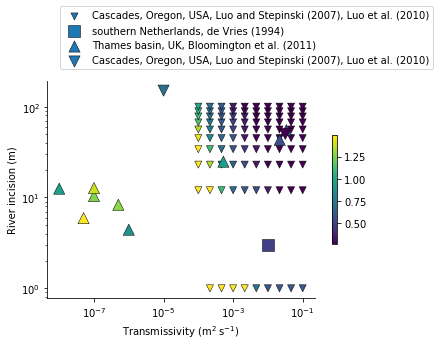

In [140]:


fig, ax =  pl.subplots(1, 1)

vmin, vmax = dfl['drainage_density'].min(), dfl['drainage_density'].max()

scm = ax.scatter(x, y, c=z, edgecolor='black', lw=0.5, label=label, marker=m, cmap=cmap2, vmin=vmin, vmax=vmax, s=50)
   

for source, m in zip(sources, markers[1:]):
    ind = dfl['source'] == source
    
    area = dfl.loc[ind, 'area'].values[0]
    
    label = f'{area}, {source}'
    
    xi = 10**dfl.loc[ind, 'log_T']
    yi = dfl.loc[ind, 'river_incision']
    zi = dfl.loc[ind, 'drainage_density']
    #xie = 
    
    sc = ax.scatter(xi, yi, c=zi, edgecolor='black', lw=0.5, label=label, marker=m, cmap=cmap2, vmin=vmin, vmax=vmax, s=125)
    
cb = fig.colorbar(sc, shrink=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(0.09, 12)

ax.set_xlabel(r'Transmissivity ($m^2\;s^{-1}$)')
ax.set_ylabel(r'River incision (m)')
#ax.set_ylabel('Drainage density ($km^{-1}$)')
ax.legend(loc='lower left', bbox_to_anchor=(0.03, 1.03))
#ax.legend(loc='lower left')

fig.savefig('fig/drainage_density_literature_comp_v2.pdf')